In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [13]:

root = '/mnt/home/lakshmia/SummaryGen/'
data_folder = 'data/interim/'
file = 'addlvar.csv'
file1 = 'Text_POS.csv'
file2 = 'Summ_POS.csv'
output = 'images/BandH/'

data = pd.read_csv(root + data_folder + file)
data1 = pd.read_csv(root + data_folder + file1)
data2 = pd.read_csv(root + data_folder + file2)


def plot_boxplots(data, plot_vars, labels, figsize, opath):
    ''' Plot a box-plot of the variables in the plot_vars list using the labels and a size of figesize
        Input:
        - data: a dataframe, containing the data points to plot
        - plot_vars: a (1,x) array, containig the columns to plot
        - labels: a dctionary, to map the column names to its label
        - figsize: a tuple, indicating the size of the figure
    '''
    

    # Determine the number of columns to plot
    ncols = 1

    # Create a figure and its axes for the dimensions defined
    f, axes = plt.subplots(1, ncols, sharey=False, figsize=figsize)

    # For every variable in the plot_vars
    for j in range(ncols):
        # If the column name is defined we plot it
        if plot_vars[j] in data.columns:
            # Set the title
            axes.set_title(labels[plot_vars[j]])
            axes.grid(True)
            # Set x ticks
            axes.tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False)
            # Plot a boxplot for the column in plot_vars
            axes.boxplot(data[plot_vars[j]])
        else:
            axes.set_visible(False)

    # Adjust the plots for a better visualization
    f.tight_layout()
    plt.show()
    
    f.savefig(root + output + opath)


def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def plot_histograms(data, var, xlim, label, figsize, opath):
    ''' Function to plot the histograms of the variables in plot_vars
        Input:
        - data: a dataframe, containing the data points to plot
        - plot_vars: a (1,x) array, containig the columns to plot
        - xlim: a list, define the max x value for every column to plot
        - labels: a dctionary, to map the column names to its label
        - figsize: a tuple, indicating the size of the figure
    '''

    # Set some parameters for the plot
    kwargs = dict(hist_kws={'alpha':.7}, kde_kws={'linewidth':2})

    # Create the figure and axes
    fig, axes = plt.subplots(1, plot_vars.shape[0], figsize=figsize, sharey=False, dpi=100)

    #For every variable in plot_vars
    for i in range(1):
        
    # Plot the histogram 
        sns.histplot(data[var], color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1),), 
                    ax=axes, bins=50, kde=True)       
    
    # For a better visualization we set the x limit
    axes.set_xlim(left=0, right=xlim)
    axes.set(xlabel=label, ylabel="Count")
    axes.set_title(label)
    axes.get_legend().remove()

    fig.savefig(root + output + opath)


# Completed

'''
'text_sent_count': 'Sentence Count of Texts', 'sum_sent_count': 'Sentence Count of Summaries',

'''

"\n'text_sent_count': 'Sentence Count of Texts', 'sum_sent_count': 'Sentence Count of Summaries',\n\n"

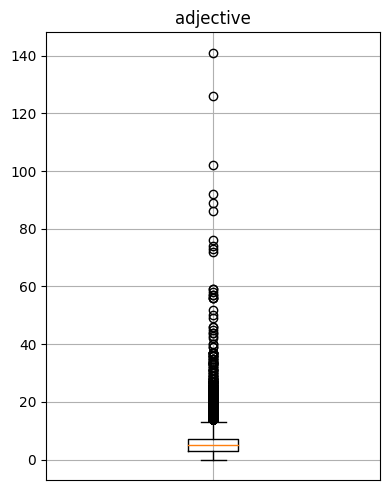

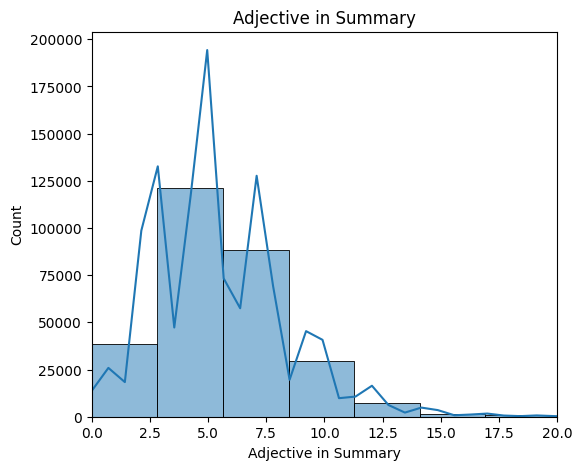

In [37]:
labels_dict={'sum_word_count': 'Word Count of Summaries','text_word_count': 'Word Count of Texts',
             'sum_char_count': 'Char Count of Summaries','text_char_count': 'Char Count of Texts',
             'sum_word_density': 'Word Density of Summaries','text_word_density': 'Word Density of Texts',
             'sum_punc_count': 'Punctuation Count of Summaries','text_punc_count': 'Punctuation Count of Texts',
             
             'text_sent_density': 'Sentence Density of Texts', 'sum_sent_density': 'Sentence Density of Summaries',
             'text_stopw_count': 'Stopwords Count of Texts', 'sum_stopw_count': 'Stopwords Count of Summaries',
             'ADJ': 'adjective','ADP': 'adposition', 'ADV': 'adverb','CONJ': 'conjunction',
             'DET': 'determiner','NOUN': 'noun', 'text_unknown_count': 'Unknown words in Texts',
             'sum_unknown_count': 'Unknown words in Summaries',}


plot_vars=np.array(['ADJ'])

plot_boxplots(data2, plot_vars , labels_dict, figsize=(4,5), opath= 'B21_ADJS')
plot_histograms(data2, plot_vars , xlim=20, label = 'Adjective in Summary', figsize=(6,5), opath= 'H21_ADJS')

#
#plot_boxplots(data, plot_vars , labels_dict, figsize=(4,5), opath= 'B14')
#plot_histograms(data, plot_vars , xlim=250, label = 'Adjective in Text', figsize=(6,5), opath= 'H15_ADJT')
